In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Capstone_Project/API_Kaggle"

In [ ]:
!kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [00:51<00:00, 95.7MB/s]
100% 3.58G/3.58G [00:51<00:00, 75.3MB/s]


In [ ]:
import zipfile

local_zip = r'/content/fruits-fresh-and-rotten-for-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

In [ ]:
dataset_dir = '/tmp/dataset/'
dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_test_dir = os.path.join(dataset_dir, 'test')

print('Address Train Dataset : {}'.format(dataset_train_dir))
print('Address Test Dataset : {}'.format(dataset_test_dir))

Address Train Dataset : /tmp/dataset/train
Address Test Dataset : /tmp/dataset/test


In [ ]:
list_train_dataset = os.listdir(dataset_train_dir)
print('List Dataset Train : {}'.format(list_train_dataset))

list_test_dataset = os.listdir(dataset_test_dir)
print('List Dataset Test : {}'.format(list_test_dataset))

List Dataset Train : ['rottenbanana', 'rottenoranges', 'freshoranges', 'rottenapples', 'freshapples', 'freshbanana']
List Dataset Test : ['rottenbanana', 'rottenoranges', 'freshoranges', 'rottenapples', 'freshapples', 'freshbanana']


In [ ]:
def total_num_files(PATH, DIRECTORY):
  selected_dir = os.path.join(PATH, DIRECTORY)
  number_of_files = len(os.listdir(selected_dir))
  return number_of_files

In [ ]:
print('Total Number of Files in Train Dataset :')
for fruit_classification in list_train_dataset:
  print('{} folder : {} file'.format(fruit_classification, total_num_files(dataset_train_dir, fruit_classification)))

Total Number of Files in Train Dataset :
rottenbanana folder : 2224 file
rottenoranges folder : 1595 file
freshoranges folder : 1466 file
rottenapples folder : 2342 file
freshapples folder : 1693 file
freshbanana folder : 1581 file


In [ ]:
print('Total Number of Files in Test Dataset :')
for fruit_classification in list_test_dataset:
  print('{} folder : {} file'.format(fruit_classification, total_num_files(dataset_test_dir, fruit_classification)))

Total Number of Files in Test Dataset :
rottenbanana folder : 530 file
rottenoranges folder : 403 file
freshoranges folder : 388 file
rottenapples folder : 601 file
freshapples folder : 395 file
freshbanana folder : 381 file


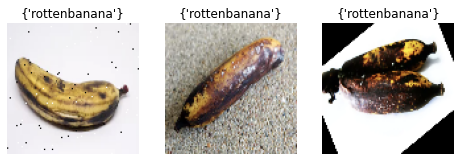

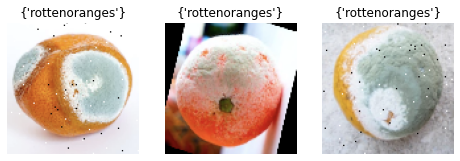

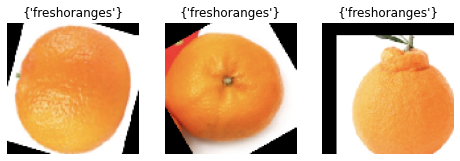

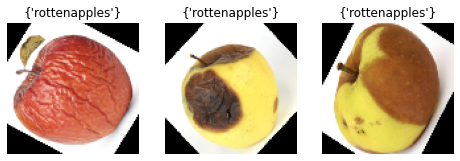

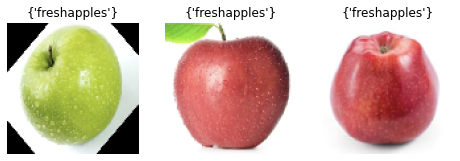

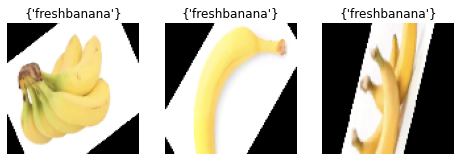

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

def plot_image(image_file):
  image_path = [file for file in os.listdir('{}/{}'.format(dataset_train_dir, image_file))]
  select_image = np.random.choice(image_path, 3, replace = False)

  fig = plt.figure(figsize = (8,6))
  for i in range(3):
    if i < 3:
      image_select = '{}/{}/{}'.format(dataset_train_dir, image_file, select_image[i])
      label = {image_file}

    ax = fig.add_subplot(1,3,i+1)

    image_show = image.load_img(image_select, target_size = (100,100))
    plt.imshow(image_show)
    plt.title(label)
    plt.axis('off')
  plt.show()

for fruit_classification in list_train_dataset:
  plot_image(fruit_classification)

In [ ]:
def create_dir(PATH):
  if not os.path.exists(PATH):
    os.mkdir(PATH)
    return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
  base_dir = '/content/'
  fruit_dir = create_dir(os.path.join(base_dir, 'fruits-fresh-and-rotten-for-classification'))
  train_dir = create_dir(os.path.join(fruit_dir, 'train'))
  validation_dir = create_dir(os.path.join(fruit_dir, 'val'))
  test_dir = create_dir(os.path.join(fruit_dir, 'test'))

  train_fresh_dir = create_dir(os.path.join(train_dir, 'fresh fruit'))
  train_rotten_dir = create_dir(os.path.join(train_dir, 'rotten fruit'))

  validation_fresh_dir = create_dir(os.path.join(validation_dir, 'fresh fruit'))
  validation_rotten_dir = create_dir(os.path.join(validation_dir, 'rotten fruit'))

  test_fresh_dir = create_dir(os.path.join(test_dir, 'fresh fruit'))
  test_rotten_dir = create_dir(os.path.join(test_dir, 'rotten fruit'))

except OSError:
  pass

In [ ]:
import random
from PIL import Image
from shutil import copyfile

def split_data(SOURCE_TRAIN, SOURCE_TEST, TRAINING, VALIDATION, TEST):
  data_train = os.listdir(SOURCE_TRAIN)
  data_test = os.listdir(SOURCE_TEST)
  
  data_random_train = random.sample(data_train, len(data_train))
  data_random_test = random.sample(data_test, len(data_test))

  split_data_train_and_val = 0.9
  split_data_test_and_val = 0.9

  train_size = len(data_train) * split_data_train_and_val
  val_size = len(data_test) * split_data_test_and_val

  for i, image_name in enumerate(data_random_train):
    image_path = os.path.join(SOURCE_TRAIN, image_name)
    if os.path.getsize(image_path) > 0:
      if i < train_size:
        copyfile(image_path, os.path.join(TRAINING, image_name))
      else:
        copyfile(image_path, os.path.join(VALIDATION, image_name))
  
  for i, image_name in enumerate(data_random_test):
    image_path = os.path.join(SOURCE_TEST, image_name)
    if os.path.getsize(image_path) > 0:
      if i < val_size:
        copyfile(image_path, os.path.join(VALIDATION, image_name))
      else:
        copyfile(image_path, os.path.join(TEST, image_name))

In [ ]:
# List Alamat Fruit Classification di dalam direktori Dataset Train
fruit_classification_train_dataset_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_train_dataset_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(dataset_train_dir, fruit_classification))})

print('Addres of Fruit Classification in Train Dataset :')
for key, val in fruit_classification_train_dataset_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Train Dataset :
rottenbanana : /tmp/dataset/train/rottenbanana
rottenoranges : /tmp/dataset/train/rottenoranges
freshoranges : /tmp/dataset/train/freshoranges
rottenapples : /tmp/dataset/train/rottenapples
freshapples : /tmp/dataset/train/freshapples
freshbanana : /tmp/dataset/train/freshbanana


In [ ]:
# List Alamat Fruit Classification di dalam direktori Dataset Test
fruit_classification_test_dataset_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_test_dataset_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(dataset_test_dir, fruit_classification))})

print('Addres of Fruit Classification in Test Dataset :')
for key, val in fruit_classification_test_dataset_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Test Dataset :
rottenbanana : /tmp/dataset/test/rottenbanana
rottenoranges : /tmp/dataset/test/rottenoranges
freshoranges : /tmp/dataset/test/freshoranges
rottenapples : /tmp/dataset/test/rottenapples
freshapples : /tmp/dataset/test/freshapples
freshbanana : /tmp/dataset/test/freshbanana


In [ ]:
list_fresh_fruit = ['freshapples', 'freshbanana', 'freshoranges']
for fresh_fruit in list_fresh_fruit:
  split_data(
      fruit_classification_train_dataset_dir[fresh_fruit],
      fruit_classification_test_dataset_dir[fresh_fruit],
      train_fresh_dir,
      validation_fresh_dir,
      test_fresh_dir
  )

In [ ]:
list_rotten_fruit = ['rottenapples', 'rottenbanana', 'rottenoranges']
for rotten_fruit in list_rotten_fruit:
  split_data(
      fruit_classification_train_dataset_dir[rotten_fruit],
      fruit_classification_test_dataset_dir[rotten_fruit],
      train_rotten_dir,
      validation_rotten_dir,
      test_rotten_dir
  )

In [ ]:
list_fruit_classification = ['fresh fruit', 'rotten fruit']

for fruit_classification in list_fruit_classification:
  print('There are {} files of {} in train dir'.format(total_num_files(train_dir, fruit_classification), fruit_classification))
  print('There are {} files of {} in validation dir'.format(total_num_files(validation_dir, fruit_classification), fruit_classification))
  print('There are {} files of {} in test dir'.format(total_num_files(test_dir, fruit_classification), fruit_classification))

There are 4267 files of fresh fruit in train dir
There are 1522 files of fresh fruit in validation dir
There are 115 files of fresh fruit in test dir
There are 5546 files of rotten fruit in train dir
There are 1996 files of rotten fruit in validation dir
There are 153 files of rotten fruit in test dir


In [ ]:
import tensorflow as tf
print('Using TensorFlow Version:', tf.__version__)

Using TensorFlow Version: 2.8.2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    target_size = (128, 128),
    class_mode = 'binary'
)

Found 9813 images belonging to 2 classes.
Found 3518 images belonging to 2 classes.
Found 268 images belonging to 2 classes.


In [ ]:
print('Class Indices in Train Generator : {}'.format(train_generator.class_indices))
print('Class Indices in Validation Generator : {}'.format(val_generator.class_indices))
print('Class Indices in Test Generator : {}'.format(test_generator.class_indices))

Class Indices in Train Generator : {'fresh fruit': 0, 'rotten fruit': 1}
Class Indices in Validation Generator : {'fresh fruit': 0, 'rotten fruit': 1}
Class Indices in Test Generator : {'fresh fruit': 0, 'rotten fruit': 1}


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
      self.model.stop_training = True
      print('\nThe accuracy of the training and validation has reached > 99%')
callbacks = myCallback()

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min', patience = 20,
    restore_best_weights = True
)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Menghitung jumlah file training, validation, test
total_train_file = 0
total_val_file = 0
total_test_file = 0

for fruit_classification in list_fruit_classification:
  total_train_file += len(os.listdir(os.path.join(train_dir, fruit_classification)))
  total_val_file += len(os.listdir(os.path.join(validation_dir, fruit_classification)))
  total_test_file += len(os.listdir(os.path.join(test_dir, fruit_classification)))

print("There are {} files in training directory".format(total_train_file))
print("There are {} files in validation directory".format(total_val_file))
print("There are {} files in test directory".format(total_test_file))

There are 9813 files in training directory
There are 3518 files in validation directory
There are 268 files in test directory


In [ ]:
modelcheck = ModelCheckpoint('fresh_and_rotten_fruit_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
# Hasil Edit History berdasarkan perubahan Steps per epoch
history = model.fit(
    train_generator,
    steps_per_epoch = (total_train_file / 32),
    epochs = 100,
    validation_data = val_generator,
    validation_steps = (total_val_file / 32),
    callbacks = [earlystop, modelcheck],
    verbose = 1
)

Epoch 1/100
307/306 [==============================] - ETA: 0s - loss: 0.5049 - accuracy: 0.7361
Epoch 1: val_accuracy improved from -inf to 0.78283, saving model to fresh_and_rotten_fruit_model.h5
306/306 [==============================] - 118s 342ms/step - loss: 0.5049 - accuracy: 0.7361 - val_loss: 0.4462 - val_accuracy: 0.7828
Epoch 2/100
307/306 [==============================] - ETA: 0s - loss: 0.2624 - accuracy: 0.8926
Epoch 2: val_accuracy did not improve from 0.78283
306/306 [==============================] - 99s 323ms/step - loss: 0.2624 - accuracy: 0.8926 - val_loss: 0.5124 - val_accuracy: 0.7075
Epoch 3/100
307/306 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.9062
Epoch 3: val_accuracy improved from 0.78283 to 0.83002, saving model to fresh_and_rotten_fruit_model.h5
306/306 [==============================] - 96s 314ms/step - loss: 0.2262 - accuracy: 0.9062 - val_loss: 0.3459 - val_accuracy: 0.8300
Epoch 4/100
307/306 [=============================

In [ ]:
from keras.models import load_model
saved_model = load_model('fresh_and_rotten_fruit_model.h5')

<function matplotlib.pyplot.show>

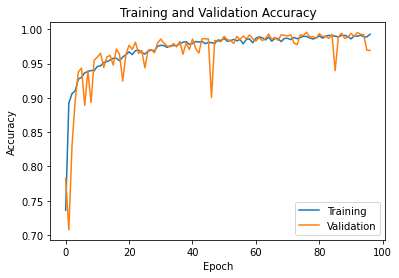

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'best')
plt.show

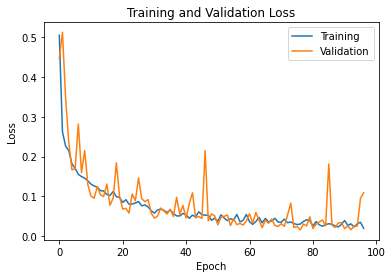

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'best')
plt.show()

In [ ]:
# Test Model
print('Test Model')
loss, acc = model.evaluate(test_generator, steps = (total_test_file / 32), verbose = 1)
print('accuracy test : {} %'.format(acc * 100))
print('loss test : {} %'.format(loss * 100))

Test Model
8/8 [==============================] - 2s 255ms/step - loss: 0.0113 - accuracy: 1.0000
accuracy test : 100.0 %
loss test : 1.131624635308981 %


Saving istockphoto-1226808018-612x612.jpg to istockphoto-1226808018-612x612.jpg


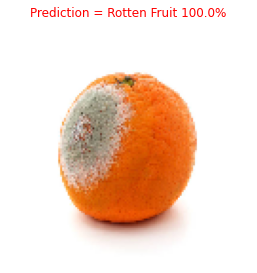

In [ ]:
from tensorflow.keras.utils import get_file
from keras.preprocessing import image
from google.colab import files
import pathlib
import cv2

model_predict = tf.keras.models.load_model('fresh_and_rotten_fruit_model.h5')
model_predict.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

image_upload = files.upload()
image_filename = []
image_prediction = []
prediction_result = []

for image_path in image_upload.keys():
  test_images = image.load_img(image_path, color_mode="rgb", target_size=(128, 128), interpolation="nearest")
  test_images = image.img_to_array(test_images)
  test_images = np.expand_dims(test_images, axis=0)
  test_images = test_images/255

  images = np.vstack([test_images])
  classes = model_predict.predict(images, batch_size=32)
  prediction_classes = np.where(classes[0] > 0.5, 1,0)
  if prediction_classes == 0:
    image_filename.append(image_path)
    image_prediction.append(1.0 - classes[0])
    prediction_result.append('Fresh Fruit')
  else:
    image_filename.append(image_path)
    image_prediction.append(classes[0])
    prediction_result.append('Rotten Fruit')

plt.figure(figsize=(20, 20))
for image_test in range(len(image_filename)):
  plt.subplot((len(image_filename)/4)+1, 4, image_test+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_filename[image_test], color_mode="rgb", target_size=(128, 128), interpolation="nearest"))
  title = 'Prediction = {} {}%'.format(prediction_result[image_test], round(float(image_prediction[image_test])*100, 2))
  if prediction_result[image_test] == 'Fresh Fruit':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_filename:
  os.system(f'rm {fn}')

In [ ]:
%cd /content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation

/content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation


In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 256
drwxr-xr-x 2 root root   4096 Jun  4 03:57 assets
-rw-r--r-- 1 root root  26151 Jun  4 03:57 keras_metadata.pb
-rw-r--r-- 1 root root 223659 Jun  4 03:57 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 03:57 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
tflite_converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
tflite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = tflite_converter.convert()

# Write TFLite model
tflite_model_file = 'fresh_and_rotten_fruit_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fresh_and_rotten_fruit_model.txt', 'w') as f:
    f.write('\n'.join(list_fruit_classification))

In [ ]:
# Save the trained model as a Keras HDF5 file. 
saved_model_path = "./fresh_and_rotten_fruit_model.h5"
model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.
!tensorflowjs_converter --input_format=keras {saved_model_path} ./modeljs

In [ ]:
!zip -r /content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation/modeljs.zip /content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation/modeljs

  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation/modeljs/ (stored 0%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation/modeljs/group1-shard1of3.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation/modeljs/group1-shard2of3.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation/modeljs/group1-shard3of3.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/fresh_and_rotten_fruit_classification_CNN_with_Image_Augmentation/modeljs/model.json (deflated 85%)


In [ ]:
try:
    files.download('fresh_and_rotten_fruit_model.h5')
    files.download('fresh_and_rotten_fruit_model.tflite')
    files.download('fresh_and_rotten_fruit_model.txt')
    files.download('modeljs.zip')
except:
    pass